# PROJECT FLIGHTS (GROUP 6)

## 1. Load all columns as string.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
airlines = pd.read_csv('http://35.225.11.165/Dataset/flight-delays/airlines.csv', sep=',',dtype=str)
airports = pd.read_csv('http://35.225.11.165/Dataset/flight-delays/airports.csv',sep=',',dtype=str)
input = pd.read_csv('http://35.225.11.165/Dataset/flight-delays/flights.csv',sep=',',dtype=str)

In [ ]:
flights=pd.DataFrame(input)

In [ ]:
idx = flights[((flights.CANCELLED == 1) | ( flights.DIVERTED == 1))].index
flights = flights.drop(idx)

In [ ]:
flights = flights.drop(columns=['FLIGHT_NUMBER',
       'TAIL_NUMBER', 'DEPARTURE_TIME', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY','DISTANCE'])

In [ ]:
flights["SCHEDULED_DEPARTURE"]=flights["SCHEDULED_DEPARTURE"].map(lambda x:str(x)[:-2])

In [ ]:
flights["SCHEDULED_ARRIVAL"]=flights["SCHEDULED_ARRIVAL"].map(lambda x:str(x)[:-2])

In [ ]:
flights = flights.dropna()

In [ ]:
selected_airlines = ["VX","B6","WN","F9","NK"]
selected_airport = ["ATL","LAX","ORD","DFW","DEN","JFK","SFO","CLT","LAS","MIA"]
flights = flights[(flights["AIRLINE"].isin(selected_airlines)) & (flights["ORIGIN_AIRPORT"].isin(selected_airport)) & (flights["DESTINATION_AIRPORT"].isin(selected_airport))]
# data = data[(data["AIRLINE"].isin(selected_airlines))]
flights = flights.reset_index(drop=True)

sz = len(flights)

## 2. Convert all dates from string into date.

In [ ]:
flights = flights.reset_index(drop=True)

In [ ]:
flights = flights.astype({"YEAR":"int64","DAY":"int64","MONTH":"int64","SCHEDULED_DEPARTURE":"int64","SCHEDULED_ARRIVAL":"int64","DAY_OF_WEEK":"int64","DEPARTURE_DELAY":"int64","ARRIVAL_DELAY":"int64"})

## 3. Convert scheduled departure, departure_time, scheduled_arrival, and arrivel_time into timestamp.

In [ ]:
sz = len(flights)
flights_date_dep = []
flights_date_arr = []
for i in range(sz):
  fl = False
  flights_date_dep.append(pd.Timestamp(flights.YEAR.loc[i],flights.MONTH.loc[i],flights.DAY.loc[i],flights.SCHEDULED_DEPARTURE.loc[i]%24))
  flights_date_arr.append(pd.Timestamp(flights.YEAR.loc[i],flights.MONTH.loc[i],flights.DAY.loc[i],flights.SCHEDULED_ARRIVAL.loc[i]%24))

In [ ]:
flights.insert(0,"DEPARTURE_TIME",flights_date_dep)

In [ ]:
flights.insert(1,"ARRIVAL_TIME",flights_date_arr)

In [ ]:
flights = flights.drop(columns={"YEAR","MONTH","DAY"})
# flights = flights.drop(columns={"YEAR","MONTH","DAY","SCHEDULED_DEPARTURE","SCHEDULED_ARRIVAL"})

## 4. Filter airlines and airports

*Filtering process is conducted on the first step because we need to reduce the data size, so the data processing can be done in better time.*

## 5. Make a label of delay. Departing and Arriving more than 15 minutes late will be classified as delayed.

In [ ]:
dep_delay = []
arr_delay = []
for i in range(sz):
  if(flights.DEPARTURE_DELAY.loc[i]>15):
    dep_delay.append(1)
  else:
    dep_delay.append(0)
  if(flights.ARRIVAL_DELAY.loc[i]>15):
    arr_delay.append(1)
  else:
    arr_delay.append(0)

In [ ]:
flights["DEPART_DELAY"]=dep_delay
flights["ARRIVE_DELAY"]=arr_delay

In [ ]:
flights = flights.drop(columns={"DEPARTURE_DELAY","ARRIVAL_DELAY"})

## 6. Encode Airlines, Airports, and Scheduled Time into columns using one-hot encoder.

In [ ]:
create_dummy = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL']

for each in create_dummy:
  dummies = pd.get_dummies(flights[each],prefix=each,drop_first=False)
  flights = pd.concat([flights,dummies],axis =1)

In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104967 entries, 0 to 104966
Data columns (total 80 columns):
DEPARTURE_TIME             104967 non-null datetime64[ns]
ARRIVAL_TIME               104967 non-null datetime64[ns]
DAY_OF_WEEK                104967 non-null int64
AIRLINE                    104967 non-null object
ORIGIN_AIRPORT             104967 non-null object
DESTINATION_AIRPORT        104967 non-null object
SCHEDULED_DEPARTURE        104967 non-null int64
SCHEDULED_ARRIVAL          104967 non-null int64
DEPART_DELAY               104967 non-null int64
ARRIVE_DELAY               104967 non-null int64
AIRLINE_B6                 104967 non-null uint8
AIRLINE_F9                 104967 non-null uint8
AIRLINE_NK                 104967 non-null uint8
AIRLINE_VX                 104967 non-null uint8
AIRLINE_WN                 104967 non-null uint8
ORIGIN_AIRPORT_ATL         104967 non-null uint8
ORIGIN_AIRPORT_CLT         104967 non-null uint8
ORIGIN_AIRPORT_DEN         104967 n

## 7. Construct more attributes

### Additional Attribute 1 : Number of Runways (Data gathered manually)

In [ ]:

depart_run = []
arrive_run = []
for i in range(sz):
  if((flights.ORIGIN_AIRPORT_LAX.loc[i]==1) | (flights.ORIGIN_AIRPORT_LAS.loc[i]==1) | (flights.ORIGIN_AIRPORT_JFK.loc[i]==1) | (flights.ORIGIN_AIRPORT_CLT.loc[i]==1) | (flights.ORIGIN_AIRPORT_MIA.loc[i]==1) | (flights.ORIGIN_AIRPORT_SFO.loc[i]==1) ):
    depart_run.append(4)
  elif((flights.ORIGIN_AIRPORT_ATL.loc[i]==1)):
    depart_run.append(5)
  elif((flights.ORIGIN_AIRPORT_DEN.loc[i]==1)):
    depart_run.append(6)
  else:
    depart_run.append(7)
  if((flights.DESTINATION_AIRPORT_LAX.loc[i]==1) | (flights.DESTINATION_AIRPORT_LAS.loc[i]==1) | (flights.DESTINATION_AIRPORT_JFK.loc[i]==1) | (flights.DESTINATION_AIRPORT_CLT.loc[i]==1) | (flights.DESTINATION_AIRPORT_MIA.loc[i]==1) | (flights.DESTINATION_AIRPORT_SFO.loc[i]==1) ):
    arrive_run.append(4)
  elif((flights.DESTINATION_AIRPORT_ATL.loc[i]==1)):
    arrive_run.append(5)
  elif((flights.DESTINATION_AIRPORT_DEN.loc[i]==1)):
    arrive_run.append(6)
  else:
    arrive_run.append(7)

In [ ]:
flights.insert(5,"ORIGIN_RUNWAYS",depart_run)
flights.insert(7,"DESTINATION_RUNWAYS",arrive_run)

In [ ]:
flights.head()

,DEPARTURE_TIME,ARRIVAL_TIME,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,ORIGIN_RUNWAYS,DESTINATION_AIRPORT,DESTINATION_RUNWAYS,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPART_DELAY,ARRIVE_DELAY,AIRLINE_B6,AIRLINE_F9,AIRLINE_NK,AIRLINE_VX,AIRLINE_WN,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_CLT,ORIGIN_AIRPORT_DEN,ORIGIN_AIRPORT_DFW,ORIGIN_AIRPORT_JFK,ORIGIN_AIRPORT_LAS,ORIGIN_AIRPORT_LAX,ORIGIN_AIRPORT_MIA,ORIGIN_AIRPORT_ORD,ORIGIN_AIRPORT_SFO,DESTINATION_AIRPORT_ATL,DESTINATION_AIRPORT_CLT,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_MIA,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_SFO,SCHEDULED_DEPARTURE_0,SCHEDULED_DEPARTURE_1,SCHEDULED_DEPARTURE_2,...,SCHEDULED_DEPARTURE_7,SCHEDULED_DEPARTURE_8,SCHEDULED_DEPARTURE_9,SCHEDULED_DEPARTURE_10,SCHEDULED_DEPARTURE_11,SCHEDULED_DEPARTURE_12,SCHEDULED_DEPARTURE_13,SCHEDULED_DEPARTURE_14,SCHEDULED_DEPARTURE_15,SCHEDULED_DEPARTURE_16,SCHEDULED_DEPARTURE_17,SCHEDULED_DEPARTURE_18,SCHEDULED_DEPARTURE_19,SCHEDULED_DEPARTURE_20,SCHEDULED_DEPARTURE_21,SCHEDULED_DEPARTURE_22,SCHEDULED_DEPARTURE_23,SCHEDULED_ARRIVAL_0,SCHEDULED_ARRIVAL_1,SCHEDULED_ARRIVAL_2,SCHEDULED_ARRIVAL_4,SCHEDULED_ARRIVAL_5,SCHEDULED_ARRIVAL_6,SCHEDULED_ARRIVAL_7,SCHEDULED_ARRIVAL_8,SCHEDULED_ARRIVAL_9,SCHEDULED_ARRIVAL_10,SCHEDULED_ARRIVAL_11,SCHEDULED_ARRIVAL_12,SCHEDULED_ARRIVAL_13,SCHEDULED_ARRIVAL_14,SCHEDULED_ARRIVAL_15,SCHEDULED_ARRIVAL_16,SCHEDULED_ARRIVAL_17,SCHEDULED_ARRIVAL_18,SCHEDULED_ARRIVAL_19,SCHEDULED_ARRIVAL_20,SCHEDULED_ARRIVAL_21,SCHEDULED_ARRIVAL_22,SCHEDULED_ARRIVAL_23
0,2015-01-01 01:00:00,2015-01-01 05:00:00,4,NK,LAS,4,DFW,7,1,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-01 05:00:00,2015-01-01 09:00:00,4,WN,SFO,4,DEN,6,5,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-01-01 06:00:00,2015-01-01 13:00:00,4,WN,SFO,4,ATL,5,6,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2015-01-01 06:00:00,2015-01-01 07:00:00,4,F9,DFW,7,DEN,6,6,7,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-01-01 06:00:00,2015-01-01 14:00:00,4,B6,LAX,4,JFK,4,6,14,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Additional Attribute 2 : DELAY label

In [ ]:
delay = []
for i in range(sz):
  if((flights.DEPART_DELAY.loc[i]==1) | (flights.ARRIVE_DELAY.loc[i]==1)):
    delay.append(1)
  else:
    delay.append(0)

In [ ]:
flights.insert(9,"DELAY",delay)

## 8. Be Creative!

In [ ]:
flights.head()

,DEPARTURE_TIME,ARRIVAL_TIME,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,ORIGIN_RUNWAYS,DESTINATION_AIRPORT,DESTINATION_RUNWAYS,SCHEDULED_DEPARTURE,DELAY,SCHEDULED_ARRIVAL,DEPART_DELAY,ARRIVE_DELAY,AIRLINE_B6,AIRLINE_F9,AIRLINE_NK,AIRLINE_VX,AIRLINE_WN,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_CLT,ORIGIN_AIRPORT_DEN,ORIGIN_AIRPORT_DFW,ORIGIN_AIRPORT_JFK,ORIGIN_AIRPORT_LAS,ORIGIN_AIRPORT_LAX,ORIGIN_AIRPORT_MIA,ORIGIN_AIRPORT_ORD,ORIGIN_AIRPORT_SFO,DESTINATION_AIRPORT_ATL,DESTINATION_AIRPORT_CLT,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_MIA,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_SFO,SCHEDULED_DEPARTURE_0,SCHEDULED_DEPARTURE_1,...,SCHEDULED_DEPARTURE_7,SCHEDULED_DEPARTURE_8,SCHEDULED_DEPARTURE_9,SCHEDULED_DEPARTURE_10,SCHEDULED_DEPARTURE_11,SCHEDULED_DEPARTURE_12,SCHEDULED_DEPARTURE_13,SCHEDULED_DEPARTURE_14,SCHEDULED_DEPARTURE_15,SCHEDULED_DEPARTURE_16,SCHEDULED_DEPARTURE_17,SCHEDULED_DEPARTURE_18,SCHEDULED_DEPARTURE_19,SCHEDULED_DEPARTURE_20,SCHEDULED_DEPARTURE_21,SCHEDULED_DEPARTURE_22,SCHEDULED_DEPARTURE_23,SCHEDULED_ARRIVAL_0,SCHEDULED_ARRIVAL_1,SCHEDULED_ARRIVAL_2,SCHEDULED_ARRIVAL_4,SCHEDULED_ARRIVAL_5,SCHEDULED_ARRIVAL_6,SCHEDULED_ARRIVAL_7,SCHEDULED_ARRIVAL_8,SCHEDULED_ARRIVAL_9,SCHEDULED_ARRIVAL_10,SCHEDULED_ARRIVAL_11,SCHEDULED_ARRIVAL_12,SCHEDULED_ARRIVAL_13,SCHEDULED_ARRIVAL_14,SCHEDULED_ARRIVAL_15,SCHEDULED_ARRIVAL_16,SCHEDULED_ARRIVAL_17,SCHEDULED_ARRIVAL_18,SCHEDULED_ARRIVAL_19,SCHEDULED_ARRIVAL_20,SCHEDULED_ARRIVAL_21,SCHEDULED_ARRIVAL_22,SCHEDULED_ARRIVAL_23
0,2015-01-01 01:00:00,2015-01-01 05:00:00,4,NK,LAS,4,DFW,7,1,0,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-01 05:00:00,2015-01-01 09:00:00,4,WN,SFO,4,DEN,6,5,0,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-01-01 06:00:00,2015-01-01 13:00:00,4,WN,SFO,4,ATL,5,6,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2015-01-01 06:00:00,2015-01-01 07:00:00,4,F9,DFW,7,DEN,6,6,1,7,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-01-01 06:00:00,2015-01-01 14:00:00,4,B6,LAX,4,JFK,4,6,0,14,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
temp = flights.drop(columns={"DEPARTURE_TIME","ARRIVAL_TIME","DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT","DEPART_DELAY","ARRIVE_DELAY"})

In [ ]:
temp.head()

,ORIGIN_RUNWAYS,DESTINATION_RUNWAYS,SCHEDULED_DEPARTURE,DELAY,SCHEDULED_ARRIVAL,AIRLINE_B6,AIRLINE_F9,AIRLINE_NK,AIRLINE_VX,AIRLINE_WN,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_CLT,ORIGIN_AIRPORT_DEN,ORIGIN_AIRPORT_DFW,ORIGIN_AIRPORT_JFK,ORIGIN_AIRPORT_LAS,ORIGIN_AIRPORT_LAX,ORIGIN_AIRPORT_MIA,ORIGIN_AIRPORT_ORD,ORIGIN_AIRPORT_SFO,DESTINATION_AIRPORT_ATL,DESTINATION_AIRPORT_CLT,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_MIA,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_SFO,SCHEDULED_DEPARTURE_0,SCHEDULED_DEPARTURE_1,SCHEDULED_DEPARTURE_2,SCHEDULED_DEPARTURE_5,SCHEDULED_DEPARTURE_6,SCHEDULED_DEPARTURE_7,SCHEDULED_DEPARTURE_8,SCHEDULED_DEPARTURE_9,SCHEDULED_DEPARTURE_10,SCHEDULED_DEPARTURE_11,SCHEDULED_DEPARTURE_12,SCHEDULED_DEPARTURE_13,SCHEDULED_DEPARTURE_14,SCHEDULED_DEPARTURE_15,SCHEDULED_DEPARTURE_16,SCHEDULED_DEPARTURE_17,SCHEDULED_DEPARTURE_18,SCHEDULED_DEPARTURE_19,SCHEDULED_DEPARTURE_20,SCHEDULED_DEPARTURE_21,SCHEDULED_DEPARTURE_22,SCHEDULED_DEPARTURE_23,SCHEDULED_ARRIVAL_0,SCHEDULED_ARRIVAL_1,SCHEDULED_ARRIVAL_2,SCHEDULED_ARRIVAL_4,SCHEDULED_ARRIVAL_5,SCHEDULED_ARRIVAL_6,SCHEDULED_ARRIVAL_7,SCHEDULED_ARRIVAL_8,SCHEDULED_ARRIVAL_9,SCHEDULED_ARRIVAL_10,SCHEDULED_ARRIVAL_11,SCHEDULED_ARRIVAL_12,SCHEDULED_ARRIVAL_13,SCHEDULED_ARRIVAL_14,SCHEDULED_ARRIVAL_15,SCHEDULED_ARRIVAL_16,SCHEDULED_ARRIVAL_17,SCHEDULED_ARRIVAL_18,SCHEDULED_ARRIVAL_19,SCHEDULED_ARRIVAL_20,SCHEDULED_ARRIVAL_21,SCHEDULED_ARRIVAL_22,SCHEDULED_ARRIVAL_23
0,4,7,1,0,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,6,5,0,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,5,6,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,7,6,6,1,7,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,4,6,0,14,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(temp.drop(["DELAY"],axis = 1)),
        columns=['ORIGIN_RUNWAYS', 'DESTINATION_RUNWAYS', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL', 'AIRLINE_B6', 'AIRLINE_F9',
       'AIRLINE_NK', 'AIRLINE_VX', 'AIRLINE_WN', 'ORIGIN_AIRPORT_ATL',
       'ORIGIN_AIRPORT_CLT', 'ORIGIN_AIRPORT_DEN', 'ORIGIN_AIRPORT_DFW',
       'ORIGIN_AIRPORT_JFK', 'ORIGIN_AIRPORT_LAS', 'ORIGIN_AIRPORT_LAX',
       'ORIGIN_AIRPORT_MIA', 'ORIGIN_AIRPORT_ORD', 'ORIGIN_AIRPORT_SFO',
       'DESTINATION_AIRPORT_ATL', 'DESTINATION_AIRPORT_CLT',
       'DESTINATION_AIRPORT_DEN', 'DESTINATION_AIRPORT_DFW',
       'DESTINATION_AIRPORT_JFK', 'DESTINATION_AIRPORT_LAS',
       'DESTINATION_AIRPORT_LAX', 'DESTINATION_AIRPORT_MIA',
       'DESTINATION_AIRPORT_ORD', 'DESTINATION_AIRPORT_SFO',
       'SCHEDULED_DEPARTURE_0', 'SCHEDULED_DEPARTURE_1',
       'SCHEDULED_DEPARTURE_2', 'SCHEDULED_DEPARTURE_5',
       'SCHEDULED_DEPARTURE_6', 'SCHEDULED_DEPARTURE_7',
       'SCHEDULED_DEPARTURE_8', 'SCHEDULED_DEPARTURE_9',
       'SCHEDULED_DEPARTURE_10', 'SCHEDULED_DEPARTURE_11',
       'SCHEDULED_DEPARTURE_12', 'SCHEDULED_DEPARTURE_13',
       'SCHEDULED_DEPARTURE_14', 'SCHEDULED_DEPARTURE_15',
       'SCHEDULED_DEPARTURE_16', 'SCHEDULED_DEPARTURE_17',
       'SCHEDULED_DEPARTURE_18', 'SCHEDULED_DEPARTURE_19',
       'SCHEDULED_DEPARTURE_20', 'SCHEDULED_DEPARTURE_21',
       'SCHEDULED_DEPARTURE_22', 'SCHEDULED_DEPARTURE_23',
       'SCHEDULED_ARRIVAL_0', 'SCHEDULED_ARRIVAL_1', 'SCHEDULED_ARRIVAL_2',
       'SCHEDULED_ARRIVAL_4', 'SCHEDULED_ARRIVAL_5', 'SCHEDULED_ARRIVAL_6',
       'SCHEDULED_ARRIVAL_7', 'SCHEDULED_ARRIVAL_8', 'SCHEDULED_ARRIVAL_9',
       'SCHEDULED_ARRIVAL_10', 'SCHEDULED_ARRIVAL_11', 'SCHEDULED_ARRIVAL_12',
       'SCHEDULED_ARRIVAL_13', 'SCHEDULED_ARRIVAL_14', 'SCHEDULED_ARRIVAL_15',
       'SCHEDULED_ARRIVAL_16', 'SCHEDULED_ARRIVAL_17', 'SCHEDULED_ARRIVAL_18',
       'SCHEDULED_ARRIVAL_19', 'SCHEDULED_ARRIVAL_20', 'SCHEDULED_ARRIVAL_21',
       'SCHEDULED_ARRIVAL_22', 'SCHEDULED_ARRIVAL_23'])

display(X.head())

,ORIGIN_RUNWAYS,DESTINATION_RUNWAYS,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIRLINE_B6,AIRLINE_F9,AIRLINE_NK,AIRLINE_VX,AIRLINE_WN,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_CLT,ORIGIN_AIRPORT_DEN,ORIGIN_AIRPORT_DFW,ORIGIN_AIRPORT_JFK,ORIGIN_AIRPORT_LAS,ORIGIN_AIRPORT_LAX,ORIGIN_AIRPORT_MIA,ORIGIN_AIRPORT_ORD,ORIGIN_AIRPORT_SFO,DESTINATION_AIRPORT_ATL,DESTINATION_AIRPORT_CLT,DESTINATION_AIRPORT_DEN,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_LAS,DESTINATION_AIRPORT_LAX,DESTINATION_AIRPORT_MIA,DESTINATION_AIRPORT_ORD,DESTINATION_AIRPORT_SFO,SCHEDULED_DEPARTURE_0,SCHEDULED_DEPARTURE_1,SCHEDULED_DEPARTURE_2,SCHEDULED_DEPARTURE_5,SCHEDULED_DEPARTURE_6,SCHEDULED_DEPARTURE_7,SCHEDULED_DEPARTURE_8,SCHEDULED_DEPARTURE_9,SCHEDULED_DEPARTURE_10,SCHEDULED_DEPARTURE_11,SCHEDULED_DEPARTURE_12,SCHEDULED_DEPARTURE_13,SCHEDULED_DEPARTURE_14,SCHEDULED_DEPARTURE_15,SCHEDULED_DEPARTURE_16,SCHEDULED_DEPARTURE_17,SCHEDULED_DEPARTURE_18,SCHEDULED_DEPARTURE_19,SCHEDULED_DEPARTURE_20,SCHEDULED_DEPARTURE_21,SCHEDULED_DEPARTURE_22,SCHEDULED_DEPARTURE_23,SCHEDULED_ARRIVAL_0,SCHEDULED_ARRIVAL_1,SCHEDULED_ARRIVAL_2,SCHEDULED_ARRIVAL_4,SCHEDULED_ARRIVAL_5,SCHEDULED_ARRIVAL_6,SCHEDULED_ARRIVAL_7,SCHEDULED_ARRIVAL_8,SCHEDULED_ARRIVAL_9,SCHEDULED_ARRIVAL_10,SCHEDULED_ARRIVAL_11,SCHEDULED_ARRIVAL_12,SCHEDULED_ARRIVAL_13,SCHEDULED_ARRIVAL_14,SCHEDULED_ARRIVAL_15,SCHEDULED_ARRIVAL_16,SCHEDULED_ARRIVAL_17,SCHEDULED_ARRIVAL_18,SCHEDULED_ARRIVAL_19,SCHEDULED_ARRIVAL_20,SCHEDULED_ARRIVAL_21,SCHEDULED_ARRIVAL_22,SCHEDULED_ARRIVAL_23
0,-0.637213,2.139908,-2.408403,-1.766830,-0.417097,-0.443258,2.503030,-0.518139,-0.715034,-0.259635,-0.0782,-0.417664,-0.194363,-0.332756,2.054619,-0.508480,-0.101674,-0.280926,-0.445840,-0.259635,-0.078139,-0.417286,5.161852,-0.332986,-0.486723,-0.50845,-0.101865,-0.281005,-0.446285,-0.082757,21.110852,-0.003087,-0.124335,-0.263564,-0.25256,-0.264018,-0.259802,-0.256148,-0.254242,-0.230762,-0.26581,-0.227515,-0.247267,-0.244894,-0.235486,-0.245309,-0.210604,-0.273252,-0.226215,-0.16081,-0.160217,-0.133722,-0.06946,-0.012727,-0.07912,6.828300,-0.110975,-0.187584,-0.198496,-0.239538,-0.255217,-0.215709,-0.250096,-0.245701,-0.260825,-0.239827,-0.243865,-0.243953,-0.224862,-0.259175,-0.224207,-0.263832,-0.267449,-0.27299
1,-0.637213,1.214408,-1.634548,-1.045319,-0.417097,-0.443258,-0.399516,-0.518139,1.398535,-0.259635,-0.0782,-0.417664,-0.194363,-0.332756,-0.486708,-0.508480,-0.101674,-0.280926,2.242956,-0.259635,-0.078139,2.396439,-0.193729,-0.332986,-0.486723,-0.50845,-0.101865,-0.281005,-0.446285,-0.082757,-0.047369,-0.003087,8.042791,-0.263564,-0.25256,-0.264018,-0.259802,-0.256148,-0.254242,-0.230762,-0.26581,-0.227515,-0.247267,-0.244894,-0.235486,-0.245309,-0.210604,-0.273252,-0.226215,-0.16081,-0.160217,-0.133722,-0.06946,-0.012727,-0.07912,-0.146449,-0.110975,-0.187584,-0.198496,4.174709,-0.255217,-0.215709,-0.250096,-0.245701,-0.260825,-0.239827,-0.243865,-0.243953,-0.224862,-0.259175,-0.224207,-0.263832,-0.267449,-0.27299
2,-0.637213,0.288908,-1.441084,-0.323808,-0.417097,-0.443258,-0.399516,-0.518139,1.398535,-0.259635,-0.0782,-0.417664,-0.194363,-0.332756,-0.486708,-0.508480,-0.101674,-0.280926,2.242956,3.851560,-0.078139,-0.417286,-0.193729,-0.332986,-0.486723,-0.50845,-0.101865,-0.281005,-0.446285,-0.082757,-0.047369,-0.003087,-0.124335,3.794150,-0.25256,-0.264018,-0.259802,-0.256148,-0.254242,-0.230762,-0.26581,-0.227515,-0.247267,-0.244894,-0.235486,-0.245309,-0.210604,-0.273252,-0.226215,-0.16081,-0.160217,-0.133722,-0.06946,-0.012727,-0.07912,-0.146449,-0.110975,-0.187584,-0.198496,-0.239538,-0.255217,-0.215709,-0.250096,4.069983,-0.260825,-0.239827,-0.243865,-0.243953,-0.224862,-0.259175,-0.224207,-0.263832,-0.267449,-0.27299
3,2.137845,1.214408,-1.441084,-1.406075,-0.417097,2.256021,-0.399516,-0.518139,-0.715034,-0.259635,-0.0782,-0.417664,5.145005,-0.332756,-0.486708,-0.508480,-0.101674,-0.280926,-0.445840,-0.259635,-0.078139,2.396439,-0.193729,-0.332986,-0.486723,-0.50845,-0.101865,-0.281005,-0.446285,-0.

In [ ]:
y = flights.DELAY

#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

print("Original dataset   X :{}   Y:{}".format(X.shape,y.shape))
print("Training dataset   X :{}   Y:{}".format(X_train.shape,y_train.shape))
print("Testing  dataset   X :{}   Y:{}".format(X_test.shape,y_test.shape))

# create Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=91,max_depth = 100,criterion="entropy")
model.fit(X_train, y_train)
model.score(X_test,y_test)

Original dataset   X :(104967, 74)   Y:(104967,)
Training dataset   X :(83973, 74)   Y:(83973,)
Testing  dataset   X :(20994, 74)   Y:(20994,)


0.7188244260264838

Text(0.5, 15.0, 'Predicted label')

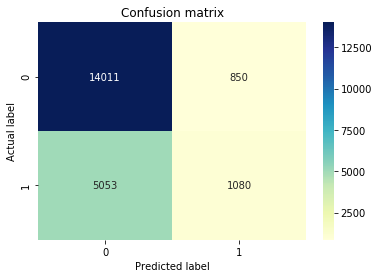

In [ ]:
y_pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.94      0.83     14861
           1       0.56      0.17      0.27      6133

    accuracy                           0.72     20994
   macro avg       0.65      0.56      0.55     20994
weighted avg       0.68      0.72      0.66     20994

0.7184909974278365


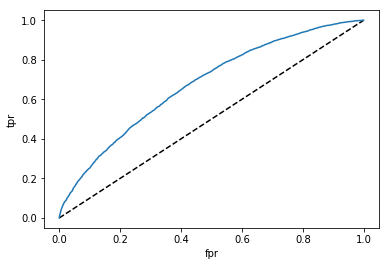

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6766895268731509

## 9. Calculate correlation between each of your constructed attributes and the delay. Are they highly correlated?

# QUESTIONS

Help Tiket to answer the following questions:
1. Is this a supervised or unsupervised problem? Is this classification, regression, or clustering
problem?
2. Which airline has the highest number of delay?
3. Which airport has the highest number of departing/arriving delay?
4. What is the most popular airport/airline?
5. How long is the longest departing/arriving delay?
6. How much does Tiket have to pay in the old strategy?
7. What cause delay? What attributes have a high correlation with delay?

## Q2. AIRLINES WITH HIGHEST NUMBER OF DELAY

In [ ]:
input = pd.read_csv('http://35.225.11.165/Dataset/flight-delays/flights.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data = input.copy()
idx = data[(data['CANCELLED']==1) | (data['DIVERTED']==1)].index
data = data.drop(idx)

In [ ]:
selected_airlines = ["VX","B6","WN","F9","NK"]
data = data[(data["AIRLINE"].isin(selected_airlines))]
data = data[((data.DEPARTURE_DELAY>15) | (data.ARRIVAL_DELAY>15))]
data = data.reset_index(drop=True)

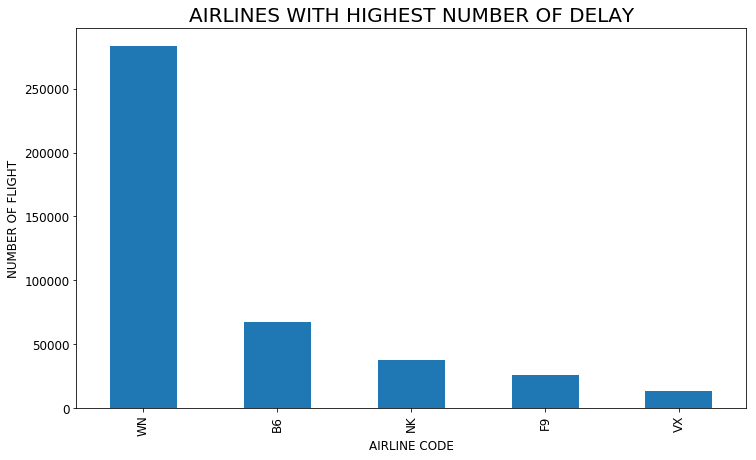

Southwest Airlines Co. has the highest number of delays with 283752 delayed flights


In [ ]:
import matplotlib.pyplot as plt

pd.value_counts(data['AIRLINE']).plot(kind="bar",figsize=(12,7),fontsize=12)
plt.title('AIRLINES WITH HIGHEST NUMBER OF DELAY', fontsize=20)
plt.ylabel('NUMBER OF FLIGHT',fontsize=12)
plt.xlabel('AIRLINE CODE',fontsize=12)
maxi = int(0)
highest_airline = None
for i in selected_airlines:
  tmp = len(data[(data.AIRLINE==i) & ((data.DEPARTURE_DELAY>15) | (data.ARRIVAL_DELAY>15))])
  if tmp > maxi:
    maxi=tmp
    highest_airline = i
plt.show()
highest_airline = airlines[airlines.IATA_CODE==highest_airline].AIRLINE
print(highest_airline.iloc[0], 'has the highest number of delays with', maxi, 'delayed flights')

## Q3. AIRPORT WITH HIGHEST DEPARTURE DELAY

In [ ]:
data = input.copy()
selected_airport = ["ATL","LAX","ORD","DFW","DEN","JFK","SFO","CLT","LAS","MIA"]
data = data[(data["ORIGIN_AIRPORT"].isin(selected_airport)) | (data["DESTINATION_AIRPORT"].isin(selected_airport))]
data = data[(data.DEPARTURE_DELAY>15)]
data = data.reset_index(drop=True)

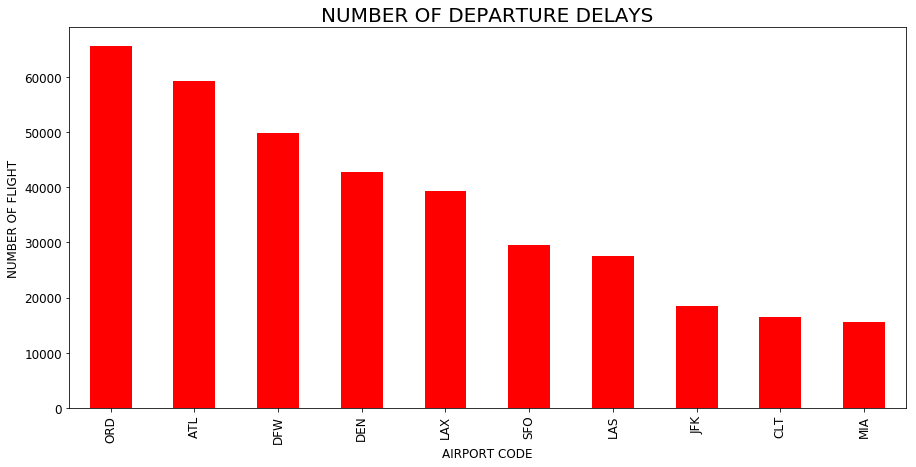

Chicago O'Hare International Airport has the highest number of delays with 65670 delayed departure


In [ ]:
pd.value_counts(data['ORIGIN_AIRPORT']).head(10).plot(kind="bar",figsize=(15,7),fontsize=12,color='red')
plt.title('NUMBER OF DEPARTURE DELAYS', fontsize=20)
plt.ylabel('NUMBER OF FLIGHT',fontsize=12)
plt.xlabel('AIRPORT CODE',fontsize=12)
maxi = int(0)
highest_airport = None
for i in selected_airport:
  tmp = len(data[(data.ORIGIN_AIRPORT==i) & (data.DEPARTURE_DELAY>15)])
  if tmp > maxi:
    maxi=tmp
    highest_airport = i
    
plt.show()
highest_airport = airports[airports.IATA_CODE==highest_airport].AIRPORT
print(highest_airport.iloc[0], 'has the highest number of delays with', maxi, 'delayed departure')



## AIRPORT WITH HIGHEST ARRIVAL DELAY

In [ ]:
data = input.copy()
selected_airport = ["ATL","LAX","ORD","DFW","DEN","JFK","SFO","CLT","LAS","MIA"]
data = data[(data["ORIGIN_AIRPORT"].isin(selected_airport)) | (data["DESTINATION_AIRPORT"].isin(selected_airport))]
data = data[(data.ARRIVAL_DELAY>15)]
data = data.reset_index(drop=True)

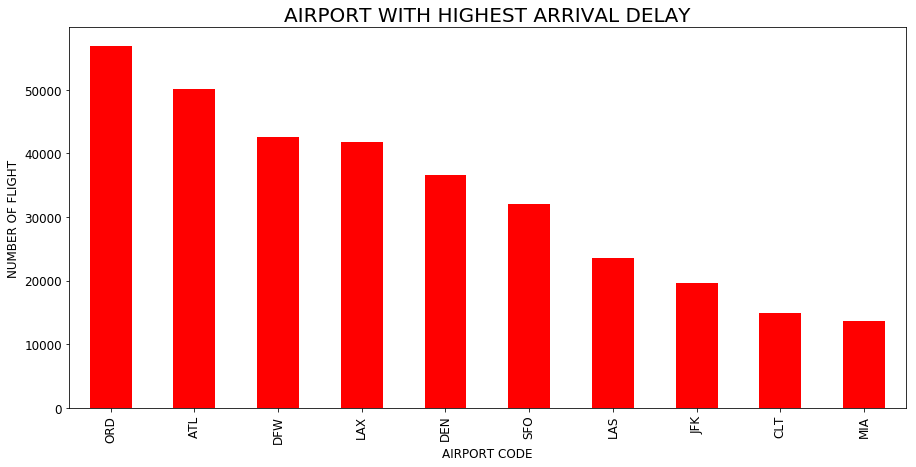

Chicago O'Hare International Airport has the highest number of delays with 56948 delayed arrival


In [ ]:
pd.value_counts(data['DESTINATION_AIRPORT']).head(10).plot(kind="bar",figsize=(15,7),fontsize=12,color='red')
plt.title('AIRPORT WITH HIGHEST ARRIVAL DELAY', fontsize=20)
plt.ylabel('NUMBER OF FLIGHT',fontsize=12)
plt.xlabel('AIRPORT CODE',fontsize=12)
maxi = int(0)
highest_airport = None
for i in selected_airport:
  tmp = len(data[(data.DESTINATION_AIRPORT==i) & (data.ARRIVAL_DELAY>15)])
  if tmp > maxi:
    maxi=tmp
    highest_airport = i
    
plt.show()
highest_airport = airports[airports.IATA_CODE==highest_airport].AIRPORT
print(highest_airport.iloc[0], 'has the highest number of delays with', maxi, 'delayed arrival')

## Q4. MOST POPULAR AIRPORT

In [ ]:
data = input.copy()
selected_airport = ["ATL","LAX","ORD","DFW","DEN","JFK","SFO","CLT","LAS","MIA"]
data = data.reset_index(drop=True)

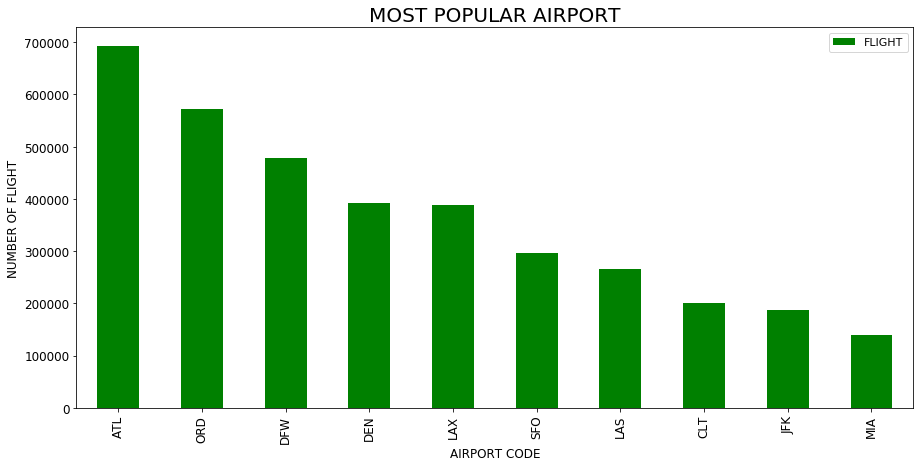

Hartsfield-Jackson Atlanta International Airport is the most popular airport with 693740 flights


In [ ]:

maxi = int(0)
highest_airport = None
air = []
fl = []
for i in selected_airport:
  tmp = len(data[(data.ORIGIN_AIRPORT==i)])+len(data[(data.DESTINATION_AIRPORT==i)])
  air.append(i)
  fl.append(tmp)
  if tmp > maxi:
    maxi=tmp
    highest_airport = i
tmp = {'AIRPORT':air,'FLIGHT':fl}
pop = pd.DataFrame(tmp)
pop = pop.sort_values(by=['FLIGHT'],ascending=False)
pop.head(10)
pop.plot(x='AIRPORT',y='FLIGHT',kind="bar",figsize=(15,7),fontsize=12,color='green')
plt.legend(fontsize=11)
plt.ylabel('NUMBER OF FLIGHT',fontsize=12)
plt.xlabel('AIRPORT CODE',fontsize=12)
plt.title('MOST POPULAR AIRPORT', fontsize=20)
plt.show()
highest_airport = airports[airports.IATA_CODE==highest_airport].AIRPORT
print(highest_airport.iloc[0], 'is the most popular airport with', maxi, 'flights')

## MOST POPULAR AIRLINE

In [ ]:
data = input.copy()
idx = data[(data['CANCELLED']==1) | (data['DIVERTED']==1)].index
data = data.drop(idx)

In [ ]:
selected_airlines = ["VX","B6","WN","F9","NK"]
data = data[(data["AIRLINE"].isin(selected_airlines))]
data = data.reset_index(drop=True)

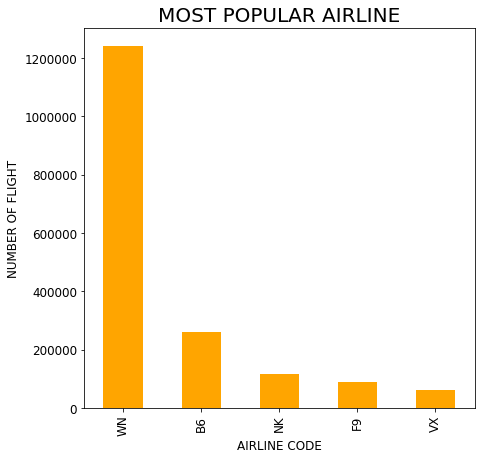

Southwest Airlines Co. is the most popular airline with 1242403 flights


In [ ]:
import matplotlib.pyplot as plt

pd.value_counts(data['AIRLINE']).plot(kind="bar",figsize=(7,7),fontsize=12,color='orange')
plt.title('MOST POPULAR AIRLINE', fontsize=20)
plt.ylabel('NUMBER OF FLIGHT',fontsize=12)
plt.xlabel('AIRLINE CODE',fontsize=12)

maxi = int(0)
highest_airline = None
for i in selected_airlines:
  tmp = len(data[(data.AIRLINE==i)])
  if tmp > maxi:
    maxi=tmp
    highest_airline = i
plt.show()
highest_airline = airlines[airlines.IATA_CODE==highest_airline].AIRLINE
print(highest_airline.iloc[0], 'is the most popular airline with', maxi, 'flights')

## Q5. The amount TIket has to pay using the old strategy

In [ ]:
data = input.copy()
idx = data[(data['CANCELLED']==1) | (data['DIVERTED']==1)].index
data = data.drop(idx)

In [ ]:
selected_airlines = ["VX","B6","WN","F9","NK"]
selected_airport = ["ATL","LAX","ORD","DFW","DEN","JFK","SFO","CLT","LAS","MIA"]
data = data[(data["AIRLINE"].isin(selected_airlines)) & (data["ORIGIN_AIRPORT"].isin(selected_airport)) & (data["DESTINATION_AIRPORT"].isin(selected_airport))]
data = data.reset_index(drop=True)

In [ ]:
print('For all transaction existed within 10 airports and 5 airlines since 2015, Tiket has to pay $',250*len(data))

For all transaction existed within 10 airports and 5 airlines since 2015, Tiket has to pay $ 26241750


## Q6. LONGEST DEPARTURE AND ARRIVING DELAY

In [ ]:
data = input.copy()
idx = data[(data['CANCELLED']==1) | (data['DIVERTED']==1)].index
data = data.drop(idx)

In [ ]:
data.DEPARTURE_DELAY.describe()

count    5.714008e+06
mean     9.294842e+00
std      3.688972e+01
min     -8.200000e+01
25%     -5.000000e+00
50%     -2.000000e+00
75%      7.000000e+00
max      1.988000e+03
Name: DEPARTURE_DELAY, dtype: float64

<u><b>The Longest Departure Delay is 1988 minutes

In [ ]:
data.ARRIVAL_DELAY.describe()

count    5.714008e+06
mean     4.407057e+00
std      3.927130e+01
min     -8.700000e+01
25%     -1.300000e+01
50%     -5.000000e+00
75%      8.000000e+00
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64

<u><b>The Longest Arrival Delay is 1971 minutes

## Q7. Attributes with high correlation with delay

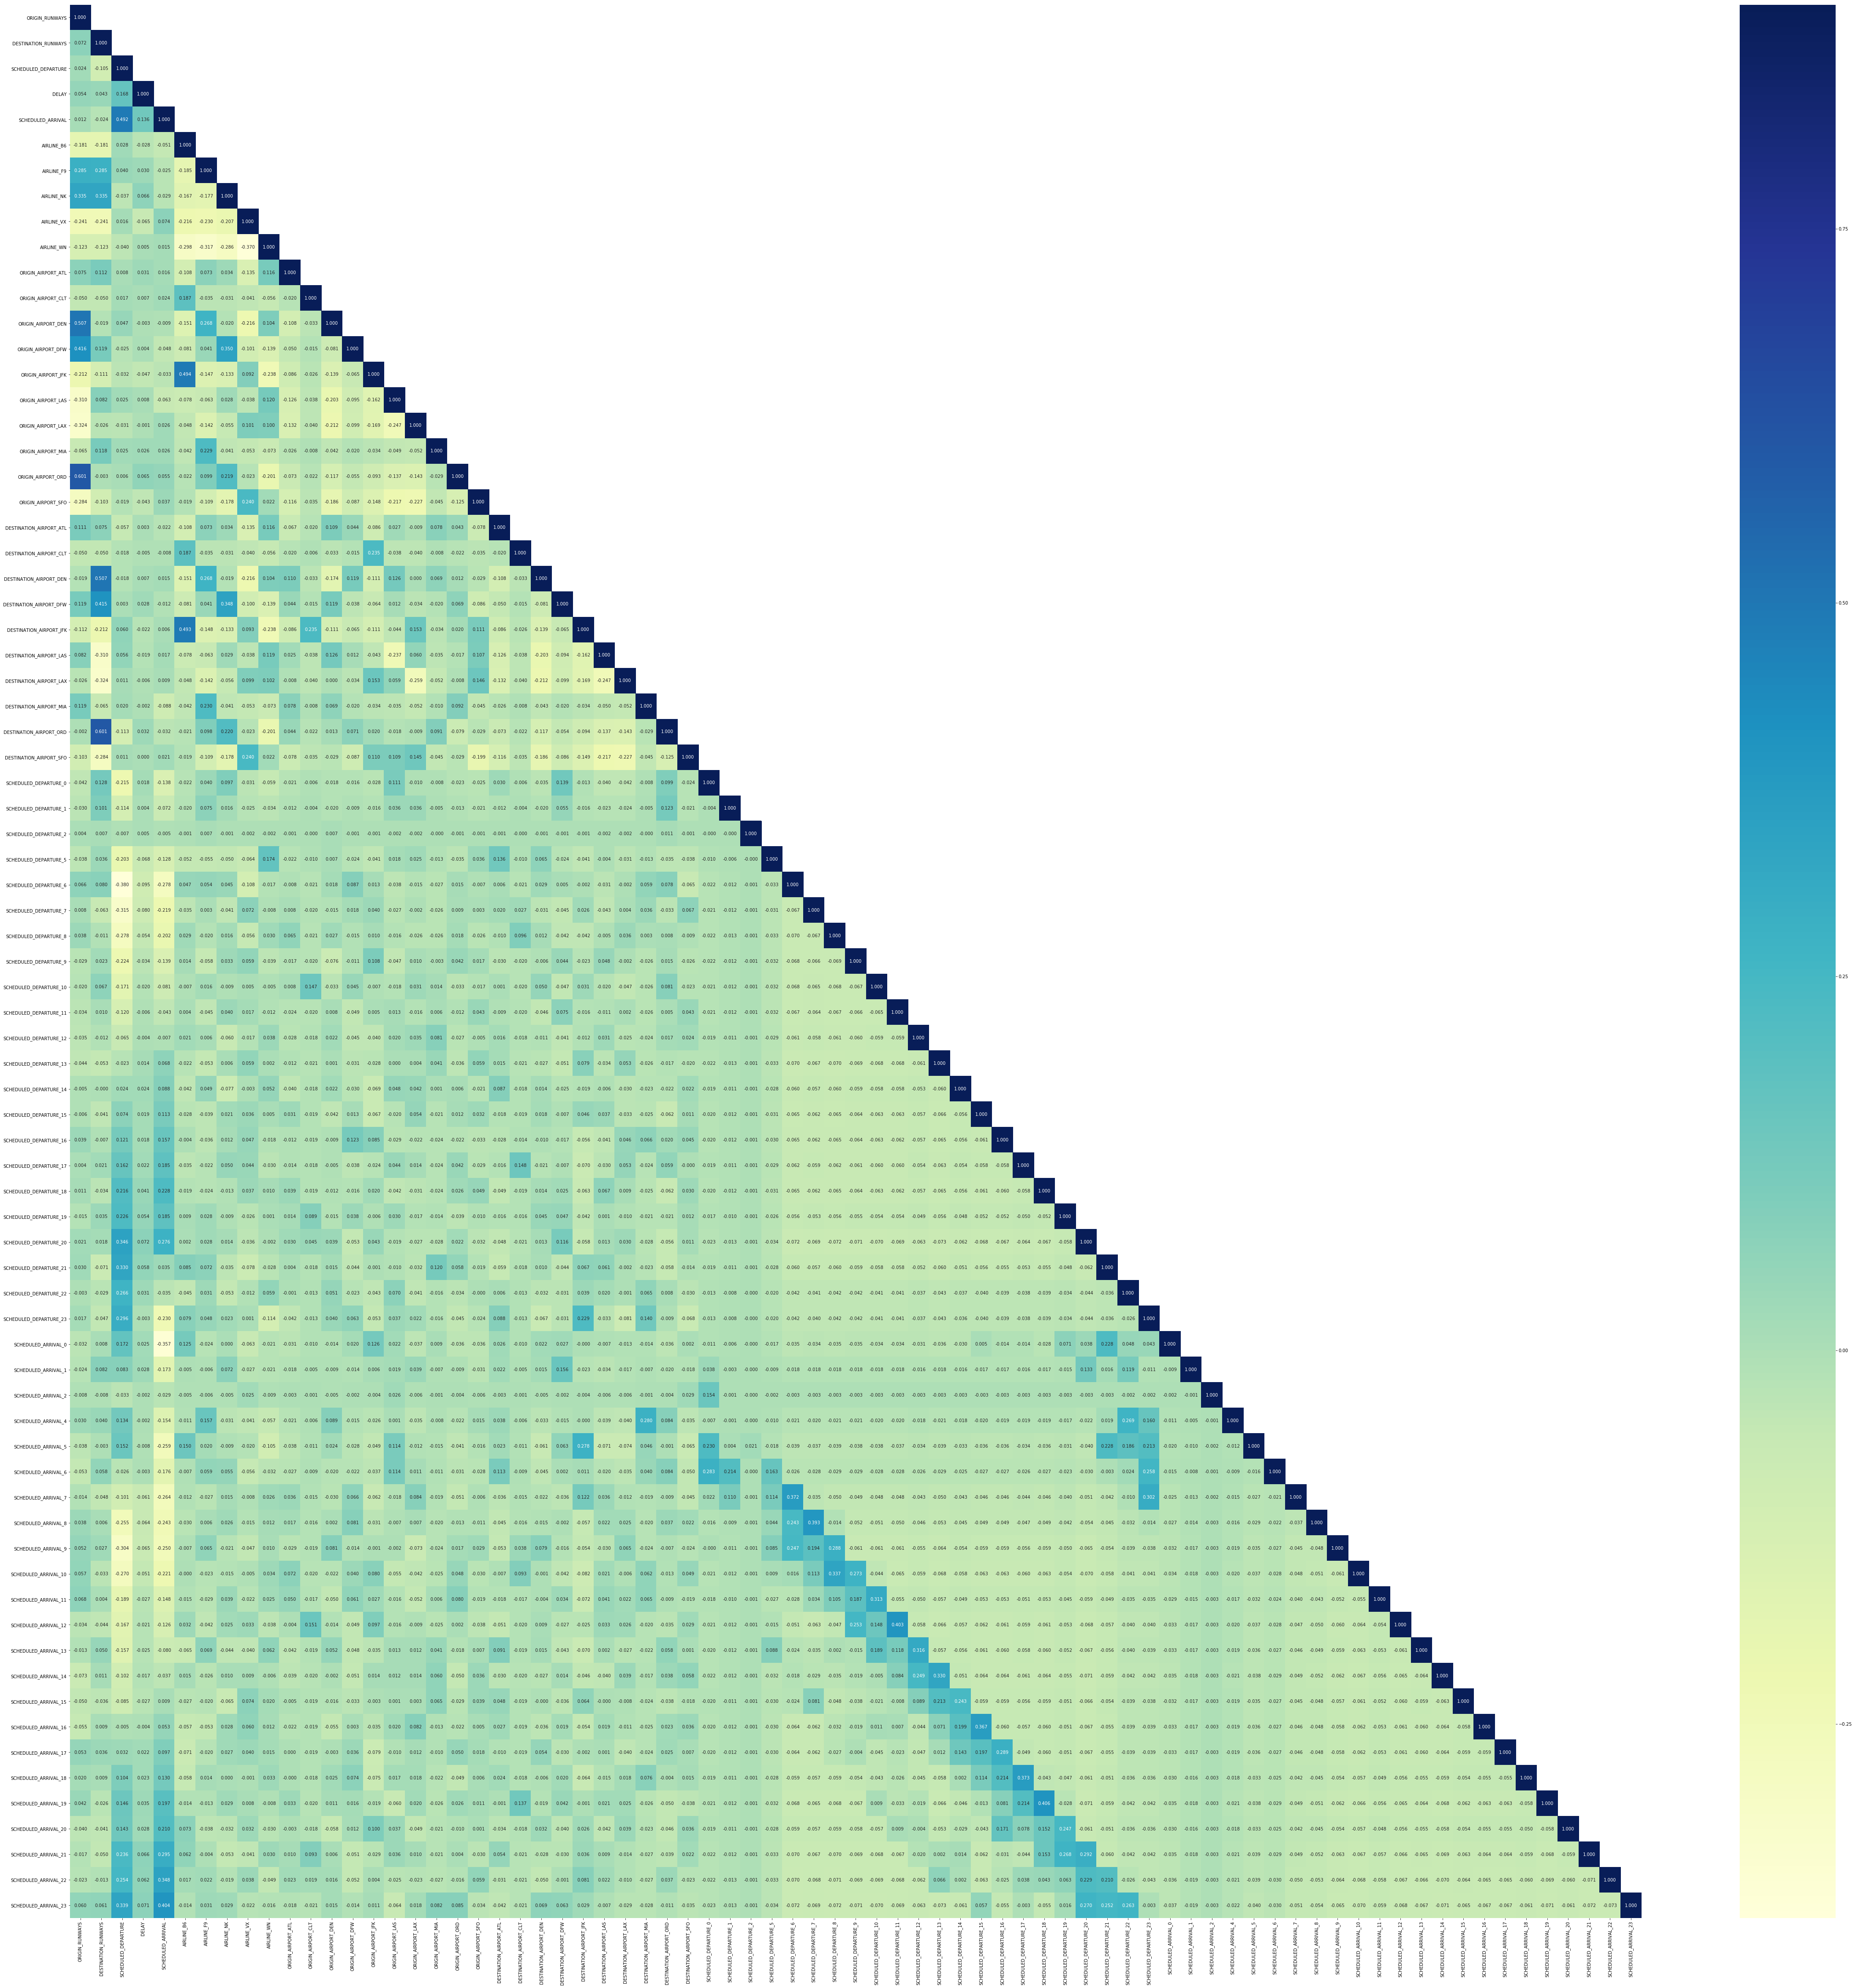

In [ ]:
columns  = temp.columns 
corrMatt = temp[columns].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(80,80))
sns.heatmap(corrMatt, mask=mask,vmax=0.9,annot=True, fmt = ".3f",cmap="YlGnBu")

Attribute SCHEDULED_DEPARTURE has the highest correlation with DELAY (0.168)